# 1. 단어 빈도와 TF-IDF 분석하기

In [55]:
with open('연구문제1-1.txt', 'r') as infile:
    lines = infile.readlines()
    non_empty_lines = [line for line in lines if line.strip() != ""]

with open('연구문제1-1(1).txt', 'w') as outfile:
    outfile.writelines(non_empty_lines)

In [1]:
from teanaps.nlp import SyntaxAnalyzer

sa = SyntaxAnalyzer()


### 연구문제1-1) 민원데이터 - 아이모드 시행전(2016.11.01~2019.11.30)

In [2]:
# TEANAPS 라이브러리를 불러옵니다.

from teanaps.nlp import MorphologicalAnalyzer
from teanaps.nlp import Processing

In [56]:
# 키워드 빈도 확인

processing = Processing()
ma = MorphologicalAnalyzer()
ma.set_tagger("okt") # Okt 형태소 분석기 사용(한국어 텍스트 분석)

tokenized_sentence_list = []
PATH = "연구문제1-1(1).txt"
POS_LIST = ["NNG", "NNP"]

f = open(PATH, encoding="utf-8")
tokenized_sentence_list = []
line_count = 0
sample_dict = {}

for line in f:
    line_count += 1
    print(line_count, end = '\r')
    line = line.strip()
    col = line.split('\t')
    word_list = ma.parse(line)
    for word, pos, loc in word_list:
        if word != "" and pos in ["NNG", "NNP"]:
            if word in sample_dict.keys():
                sample_dict[word] += 1
            else:
                sample_dict[word] = 1

f.close()

sample_list = []

for word, count in sample_dict.items():
    sample_list.append([word, count])

sample_list.sort(key=lambda elem: elem[1], reverse=True)

for word, count in sample_list[:50]:
    print(word + "\t" + str(count))

것	2734
수	2636
인천	1894
등	1404
안전	1370
설치	1304
행정	1159
자치	1053
및	1008
이용	959
생각	958
지역	958
사람	892
시	889
주민	839
제안	824
이	776
쓰레기	736
문제	709
시설	691
위	687
경우	661
버스	659
주차	656
곳	655
시민	650
현재	646
공원	632
또한	623
도로	607
더	607
개선	589
그	551
사용	544
자전거	528
발생	511
효과	502
환경	501
대한	470
차량	467
거리	451
비용	449
때	449
위해	444
함	437
때문	436
제	417
사업	415
시간	413
방안	403


In [5]:
# 민원데이터 line 갯수
line_count

12214

In [58]:
tokenized_sentence_list = []
PATH = "연구문제1-1(1).txt"
POS_LIST = ["NNG", "NNP"]

count_all=[]

f = open(PATH, encoding="utf-8")

# 파일에서 기사본문만 추출하여 명사형 문장을 생성합니다.
for line in f:
    line = line.strip()
    col = line.split("\t") 
    
     # 컬럼 수가 5개 미만이면, 해당 줄을 무시합니다.
    if len(col)<5 :
        continue
        
    post = col[0]
    title = col[1]         # 민원 제목
    category = col[2]        # 분류
    datetime = col[3]      # 작성일자
    content = " ".join(col[4:]) # 본문

    tagged_word_list = ma.parse(content)
    count_all.append(tagged_word_list)
    #sa_result = sa.parse(tagged_word_list, [])
    tokenized_sentence = processing.get_plain_text(tagged_word_list, pos_list=POS_LIST, tag=False)
    tokenized_sentence_list.append(tokenized_sentence)

            
f.close()

tokenized_sentence_list[:10]

['야외 활동 계절',
 '도시 변두리 및 농촌 지역 가로등 설치',
 '반려견 요즘 인천 애견 공원',
 '인천 아라뱃길 비롯 자전거 길 사업',
 '의류수거함 전국 이상 설치 관리 미흡 쓰레기 불법 투기 안전 사고 및 자원 낭비',
 '제 잡초 매년 마다 주변 환경 안 생각 공원 근처 시민 자주 남동구 주민',
 '각 지자체 위생 소비자 감시 식약처 소비자 감시 시민 감시 단 과 겸업 불구 각 지자체 위생 과 식약처 소비자 감시 명단 공유 겸업 사람 파악 몰래 몰래 겸업 소비자 감시 각 지자체 위생 과 식약처 부득이 일반인 구성 소비자 감시 도움 이 정보 공유 겸업 금지 정 규정 국가 정 규정 모두 국정 수행 도움 정 법률 조례 규칙 원칙 눈 피 수 피해 이익 취하 사람 계속 존재 방치 그 누구 나라 법 눈 개인 이익 취하 려 것이므 나라 바로 서기',
 '각 지자체 주민 센터 등 관공서 공무원 속 차 위층 장애인 등등 이유 계약 직 일반인 근무 근무 민원 눈 명찰 착용 전혀 구분',
 '현재 이해도 위 부득이 실명 언급 함 인천 시 구월동 신세계 백화점 하층 음식물 판매 코너 그 가까이 의류 판매 코너 또한 상존 함',
 '왕리 해수욕장 인천 서울 자주 인천 자랑거리 힐링 장소 임']

In [41]:
f = open(PATH, encoding="utf-8")
line = f.readline()
col = line.split("\t")
print("Number of columns: ", len(col))
f.close()

Number of columns:  5


In [59]:
# 전체 토큰개수 확인
all_count = 0
for i in range(0, len(count_all)):
    all_count += len(count_all[i])
print(all_count)

79045


In [42]:
# 명사 토큰개수 확인
noun_count = 0
for i in range(0, len(tokenized_sentence_list)):
    noun_count += len(tokenized_sentence_list[i].split(' '))
print(noun_count)

37484


In [16]:
from teanaps.text_analysis import TfidfCalculator

tfidf = TfidfCalculator()

In [60]:
# TF/TF-IDF 값을 계산합니다.
tfidf.calculation_tfidf(tokenized_sentence_list, tfidf_count=100, tfidf_state=True)

In [61]:
# 단어 x TF 매트릭스를 생성합니다.
tfidf.get_tf_matrix()

/  //news.naver.com/main/read.nhn  aid=0002922226  baby  benefit  care  \
0     0                               0               0     0        0     0   
1     0                               0               0     0        0     0   
2     0                               0               0     0        0     0   
3     0                               0               0     0        0     0   
4     0                               0               0     0        0     0   
...  ..                             ...             ...   ...      ...   ...   
1024  0                               0               0     0        0     0   
1025  0                               0               0     0        0     0   
1026  0                               0               0     0        0     0   
1027  0                               0               0     0        0     0   
1028  0                               0               0     0        0     0   

      center  citizen  city  day  discrepancy  fact  feel  foreigner  \
0          0        0     0    0            0     0     0          0   
1          0        0     0    0            0     0     0          0   
2          0        0     0    0            0     0     0          0   
3          0        0     0    0            0     0     0          0   
4          0        0     0    0            0     0     0          0   
...      ...      ...   ...  ...          ...   ...   ...        ...   
1024       0        0     0    0            0     0     0          0   
1025       0        0     0    0            0     0     0          0   
1026       0        0     0    0            0     0     0          0   
1027       0        0     0    0            0     0     0          0   
1028       0        0     0    0            0     0     0          0   

      government  govt  http  i  inhabitant  mid=sec  mode=lsd  name  nation  \
0              0     0     0  0           0        0         0     0       0   
1              0     0     0  0           0        0         0     0       0   
2              0     0     0  0           0        0         0     0       0   
3              0     0     0  0           0        0         0     0       0   
4              0     0     0  0           0        0         0     0       0   
...          ...   ...   ... ..         ...      ...       ...   ...     ...   
1024           0     0     0  0           0        0         0     0       0   
1025           0     0     0  0           0        0         0     0       0   
1026           0     0     0  0           0        0         0     0       0   
1027           0     0     0  0           0        0         0     0       0   
1028           0     0     0  0           0        0         0     0       0   

      oid=011  policy  proud  sid1=001  spirit  subsidy  suggestion  tax  \
0           0       0      0         0       0        0           0    0   
1           0       0      0         0       0        0           0    0   
2           0       0      0         0       0        0           0    0   
3           0       0      0         0       0        0           0    0   
4           0       0      0         0       0        0           0    0   
...       ...     ...    ...       ...     ...      ...         ...  ...   
1024        0       0      0         0       0        0           0    0   
1025        0       0      0         0       0        0           0    0   
1026        0       0      0         0       0        0           0    0   
1027        0       0      0         0       0        0           0    0   
1028        0       0      0         0       0        0           0    0   

      year  가게  가격  가구  가기  가까스로  가까이  가끔  가나  가능  가능성  가다가  가동  가득  가량  가로  \
0        0   0   0   0   0     0    0   0   0   0    0    0   0   0   0   0   
1        0   0   0   0   0     0    0   0   0   0    0    0   0   0   0   0   
2        0   0   0   0   0     0    0   0   0   0    0    0   0   0  

In [62]:
# 단어 x TF-IDF 매트릭스를 생성합니다.
tfidf.get_tfidf_matrix()

/  //news.naver.com/main/read.nhn  aid=0002922226  baby  benefit  \
0     0.0                             0.0             0.0   0.0      0.0   
1     0.0                             0.0             0.0   0.0      0.0   
2     0.0                             0.0             0.0   0.0      0.0   
3     0.0                             0.0             0.0   0.0      0.0   
4     0.0                             0.0             0.0   0.0      0.0   
...   ...                             ...             ...   ...      ...   
1024  0.0                             0.0             0.0   0.0      0.0   
1025  0.0                             0.0             0.0   0.0      0.0   
1026  0.0                             0.0             0.0   0.0      0.0   
1027  0.0                             0.0             0.0   0.0      0.0   
1028  0.0                             0.0             0.0   0.0      0.0   

      care  center  citizen  city  day  discrepancy  fact  feel  foreigner  \
0      0.0     0.0      0.0   0.0  0.0          0.0   0.0   0.0        0.0   
1      0.0     0.0      0.0   0.0  0.0          0.0   0.0   0.0        0.0   
2      0.0     0.0      0.0   0.0  0.0          0.0   0.0   0.0        0.0   
3      0.0     0.0      0.0   0.0  0.0          0.0   0.0   0.0        0.0   
4      0.0     0.0      0.0   0.0  0.0          0.0   0.0   0.0        0.0   
...    ...     ...      ...   ...  ...          ...   ...   ...        ...   
1024   0.0     0.0      0.0   0.0  0.0          0.0   0.0   0.0        0.0   
1025   0.0     0.0      0.0   0.0  0.0          0.0   0.0   0.0        0.0   
1026   0.0     0.0      0.0   0.0  0.0          0.0   0.0   0.0        0.0   
1027   0.0     0.0      0.0   0.0  0.0          0.0   0.0   0.0        0.0   
1028   0.0     0.0      0.0   0.0  0.0          0.0   0.0   0.0        0.0   

      government  govt  http    i  inhabitant  mid=sec  mode=lsd  name  \
0            0.0   0.0   0.0  0.0         0.0      0.0       0.0   0.0   
1            0.0   0.0   0.0  0.0         0.0      0.0       0.0   0.0   
2            0.0   0.0   0.0  0.0         0.0      0.0       0.0   0.0   
3            0.0   0.0   0.0  0.0         0.0      0.0       0.0   0.0   
4            0.0   0.0   0.0  0.0         0.0      0.0       0.0   0.0   
...          ...   ...   ...  ...         ...      ...       ...   ...   
1024         0.0   0.0   0.0  0.0         0.0      0.0       0.0   0.0   
1025         0.0   0.0   0.0  0.0         0.0      0.0       0.0   0.0   
1026         0.0   0.0   0.0  0.0         0.0      0.0       0.0   0.0   
1027         0.0   0.0   0.0  0.0         0.0      0.0       0.0   0.0   
1028         0.0   0.0   0.0  0.0         0.0      0.0       0.0   0.0   

      nation  oid=011  policy  proud  sid1=001  spirit  subsidy  suggestion  \
0        0.0      0.0     0.0    0.0       0.0     0.0      0.0         0.0   
1        0.0      0.0     0.0    0.0       0.0     0.0      0.0         0.0   
2        0.0      0.0     0.0    0.0       0.0     0.0      0.0         0.0   
3        0.0      0.0     0.0    0.0       0.0     0.0      0.0         0.0   
4        0.0      0.0     0.0    0.0       0.0     0.0      0.0         0.0   
...      ...      ...     ...    ...       ...     ...      ...         ...   
1024     0.0      0.0     0.0    0.0       0.0     0.0      0.0         0.0   
1025     0.0      0.0     0.0    0.0       0.0     0.0      0.0         0.0   
1026     0.0      0.0     0.0    0.0       0.0     0.0      0.0         0.0   
1027     0.0      0.0     0.0    0.0       0.0     0.0      0.0         0.0   
1028     0.0      0.0     0.0    0.0       0.0     0.0      0.0         0.0   

      tax  year   가게   가격   가구   가기  가까스로  가까이   가끔   가나   가능  가능성  가다가   가동  \
0     0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   


In [63]:
# TF 계산결과를 딕셔너리 형태로 불러옵니다.
tfidf.get_tf_dict()

{'야외': 3,
 '활동': 27,
 '계절': 4,
 '도시': 74,
 '변두리': 1,
 '농촌': 3,
 '가로등': 29,
 '설치': 291,
 '반려견': 6,
 '요즘': 30,
 '애견': 1,
 '공원': 183,
 '아라뱃길': 13,
 '비롯': 17,
 '자전거': 105,
 '길': 33,
 '사업': 75,
 '의류수거함': 1,
 '전국': 21,
 '이상': 46,
 '관리': 69,
 '미흡': 3,
 '쓰레기': 263,
 '불법': 68,
 '투기': 50,
 '안전': 91,
 '사고': 50,
 '자원': 15,
 '낭비': 10,
 '잡초': 6,
 '매년': 6,
 '마다': 20,
 '주변': 107,
 '환경': 129,
 '근처': 39,
 '자주': 19,
 '남동구': 54,
 '지자체': 44,
 '위생': 9,
 '소비자': 10,
 '감시': 33,
 '식약처': 3,
 '단': 25,
 '과': 19,
 '겸업': 4,
 '불구': 22,
 '명단': 1,
 '공유': 20,
 '파악': 12,
 '몰래': 3,
 '부득이': 2,
 '일반인': 6,
 '구성': 11,
 '도움': 32,
 '정보': 16,
 '금지': 15,
 '정': 17,
 '규정': 8,
 '국가': 34,
 '모두': 44,
 '국정': 1,
 '수행': 5,
 '법률': 5,
 '조례': 8,
 '규칙': 3,
 '원칙': 5,
 '눈': 20,
 '피': 11,
 '피해': 31,
 '이익': 16,
 '취하': 7,
 '계속': 38,
 '존재': 23,
 '방치': 25,
 '누구': 8,
 '나라': 10,
 '법': 22,
 '개인': 27,
 '려': 1,
 '것이므': 2,
 '바로': 34,
 '서기': 2,
 '센터': 30,
 '관공서': 2,
 '공무원': 112,
 '속': 18,
 '위층': 1,
 '장애인': 15,
 '등등': 16,
 '이유': 30,
 '계약': 5,
 '직': 3,
 '근무

In [64]:
# TF 계산결과를 리스트 형태로 불러옵니다.
tfidf.get_tf_list()[:100]

[['설치', 291],
 ['쓰레기', 263],
 ['시설', 216],
 ['공원', 183],
 ['버스', 156],
 ['더', 135],
 ['주차', 132],
 ['환경', 129],
 ['도로', 127],
 ['근무', 119],
 ['거리', 115],
 ['공무원', 112],
 ['주변', 107],
 ['자전거', 105],
 ['차량', 102],
 ['강화', 99],
 ['발생', 94],
 ['안전', 91],
 ['쓰레기통', 85],
 ['상황', 83],
 ['시간', 81],
 ['해결', 81],
 ['아파트', 77],
 ['사업', 75],
 ['개선', 75],
 ['도시', 74],
 ['효과', 74],
 ['관리', 69],
 ['미세먼지', 69],
 ['숙직', 69],
 ['불법', 68],
 ['위치', 67],
 ['주차장', 65],
 ['방안', 65],
 ['비용', 64],
 ['구청', 63],
 ['공간', 62],
 ['발전', 60],
 ['점', 60],
 ['오염', 60],
 ['송도', 59],
 ['매우', 57],
 ['부평구', 57],
 ['부평', 57],
 ['영향', 57],
 ['정책', 56],
 ['강화군', 56],
 ['연수구', 56],
 ['야간', 55],
 ['남동구', 54],
 ['교통', 54],
 ['여성', 54],
 ['생활', 53],
 ['통해', 53],
 ['서울', 52],
 ['대부분', 52],
 ['문화', 52],
 ['운영', 51],
 ['투기', 50],
 ['사고', 50],
 ['학생', 50],
 ['국민', 50],
 ['볼', 49],
 ['부담', 49],
 ['시행', 49],
 ['노선', 49],
 ['청소년', 49],
 ['물', 49],
 ['제도', 48],
 ['가지', 48],
 ['무단', 48],
 ['지금', 47],
 ['정도', 47],
 ['증가', 47],
 ['기관', 47],

In [65]:
# TF 계산결과를 리스트 형태로 불러옵니다.
tfidf.get_tf_list()[:30]

[['설치', 291],
 ['쓰레기', 263],
 ['시설', 216],
 ['공원', 183],
 ['버스', 156],
 ['더', 135],
 ['주차', 132],
 ['환경', 129],
 ['도로', 127],
 ['근무', 119],
 ['거리', 115],
 ['공무원', 112],
 ['주변', 107],
 ['자전거', 105],
 ['차량', 102],
 ['강화', 99],
 ['발생', 94],
 ['안전', 91],
 ['쓰레기통', 85],
 ['상황', 83],
 ['시간', 81],
 ['해결', 81],
 ['아파트', 77],
 ['사업', 75],
 ['개선', 75],
 ['도시', 74],
 ['효과', 74],
 ['관리', 69],
 ['미세먼지', 69],
 ['숙직', 69]]

In [66]:
# TF-IDF 계산결과를 딕셔너리 형태로 불러옵니다.
tfidf.get_tfidf_dict()

{'설치': 13.810331189587279,
 '쓰레기': 14.15064106949333,
 '시설': 11.257229918767337,
 '공원': 15.528726323354363,
 '버스': 14.957614611273174,
 '더': 5.751640975596627,
 '주차': 12.660070093760096,
 '환경': 6.359351867011665,
 '도로': 9.393528630639057,
 '근무': 6.722891604316894,
 '거리': 6.669465444738271,
 '공무원': 7.197494769923625,
 '주변': 7.049334995262908,
 '자전거': 9.721986892473797,
 '차량': 8.73832672515777,
 '강화': 6.519888358845756,
 '발생': 6.790590986863489,
 '안전': 6.070324720869266,
 '쓰레기통': 5.650647863234589,
 '상황': 5.61645160158032,
 '시간': 7.543236290431212,
 '해결': 3.5934131530842985,
 '아파트': 8.09532788710315,
 '사업': 6.103412911010561,
 '개선': 4.247532886703624,
 '도시': 6.475195048448103,
 '효과': 3.9434850066200475,
 '관리': 5.730049354004617,
 '미세먼지': 4.191526183320758,
 '숙직': 3.773867018022729,
 '불법': 9.533906101949327,
 '위치': 5.450210349965776,
 '주차장': 5.801051003216101,
 '방안': 3.203132236359515,
 '비용': 3.2979255548227786,
 '구청': 5.83861798317641,
 '공간': 4.73490365350319,
 '발전': 4.597910727937377,
 

In [67]:
# TF-IDF 계산결과를 리스트 형태로 불러옵니다.
tfidf.get_tfidf_list()[:20]

[['공원', 15.528726323354363],
 ['버스', 14.957614611273174],
 ['쓰레기', 14.15064106949333],
 ['설치', 13.810331189587279],
 ['주차', 12.660070093760096],
 ['시설', 11.257229918767337],
 ['자전거', 9.721986892473797],
 ['불법', 9.533906101949327],
 ['도로', 9.393528630639057],
 ['차량', 8.73832672515777],
 ['아파트', 8.09532788710315],
 ['시간', 7.543236290431212],
 ['노선', 7.4857773352350865],
 ['공무원', 7.197494769923625],
 ['주변', 7.049334995262908],
 ['발생', 6.790590986863489],
 ['근무', 6.722891604316894],
 ['거리', 6.669465444738271],
 ['강화', 6.519888358845756],
 ['도시', 6.475195048448103]]

In [68]:
# 전체 문서의 단어주머니를 불러옵니다.
tfidf.get_word_list()[:20]

['야외',
 '활동',
 '계절',
 '도시',
 '변두리',
 '농촌',
 '가로등',
 '설치',
 '반려견',
 '요즘',
 '애견',
 '공원',
 '아라뱃길',
 '비롯',
 '자전거',
 '길',
 '사업',
 '의류수거함',
 '전국',
 '이상']

In [69]:
# TF/TF-IDF 계산결과를 그래프로 표현합니다.
# 그래프에 표현할 빈도기준 Top N 개를 숫자로 입력합니다.
tfidf.draw_tfidf(50)

KeyError: ''

### TF-IDF 기준 워드클라우드

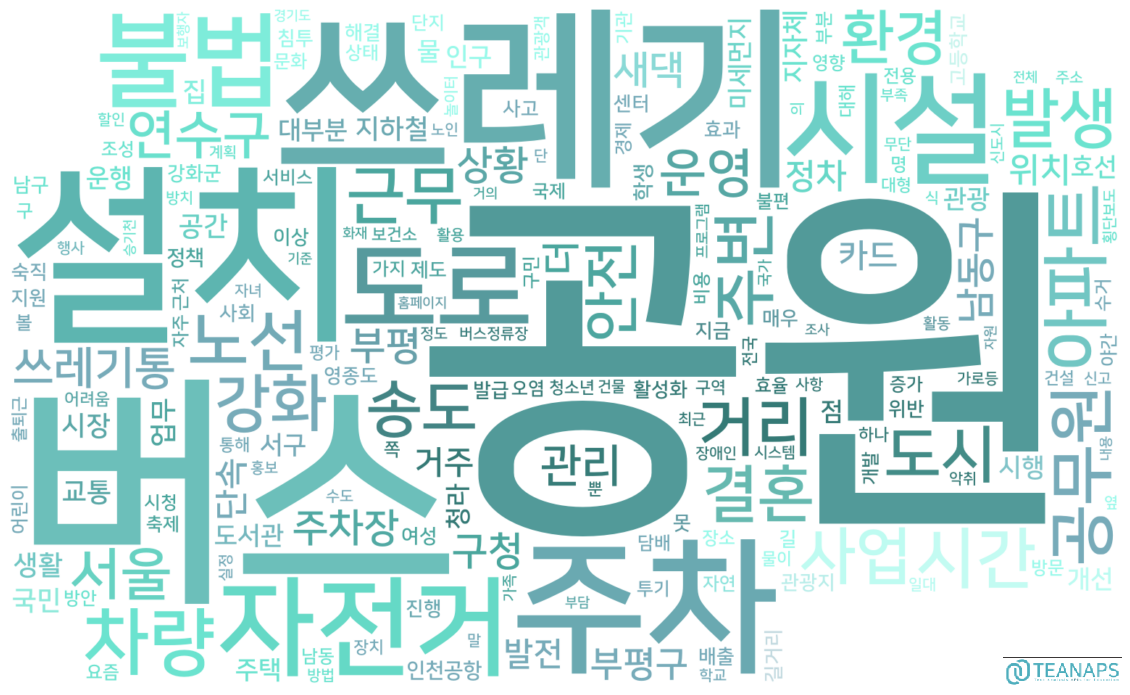

In [89]:
# TF-IDF 기준 워드클라우드를 출력합니다.
count_dict = tfidf.get_tfidf_dict()
tfidf.get_wordcloud(count_dict)

### 불용어, 동의어 처리하기 

In [3]:
from teanaps.nlp import Processing

pro = Processing()

In [24]:
#pro.clear_stopword()

#result = pro.get_stopword()
#print(result[-10:])

[]


In [4]:
# 전체 불용어 리스트를 불러옵니다.
result = pro.get_stopword()
print(result)

['안녕하십니까', '위', '개', '곳', '앞', '후', '또한', '류지', '때', '함', '비', '결과', '다른', '그', '해당', '것', '군', '현재', '제안', '부처', '및', '등', '사람', '인천시', '인천광역시', '현황', '시민', '시', '수', '인천', '모든', '지역', '처리', '제', '대한', '이용', '사용', '이', '내', '저', '중', '위해', '때문', '내', '온', '위해', '임', '생각', '주민', '경우', '알', '일', '은', '항', '로', '각', '민원', '수고', '음', '타고', '분', '글', '요', '전', '거', '무', '안', '인사', '진짜', '네', '오', '번', '엄마', '뭐', '좀', '아이', '모드', '많', '없', '같', '있', '그렇', '맘', '플', '차', '같아요', '아이모드', '있어요', '입니다', '해', '있는', '우리', '문제점', '문제', '린지', '중인', '를', '종국', '관련', '씨엘', '린지해당', '스마트']


In [67]:
pro.remove_stopword("버스")
result=pro.get_stopword()
print(result)

['안녕하십니까', '위', '개', '곳', '앞', '후', '또한', '류지', '때', '함', '비', '결과', '다른', '그', '해당', '것', '군', '현재', '제안', '부처', '및', '등', '사람', '인천시', '인천광역시', '현황', '시민', '시', '수', '인천', '모든', '지역', '처리', '제', '대한', '이용', '사용', '이', '내', '저', '중', '위해', '때문', '내', '온', '위해', '임', '생각', '주민', '경우', '알', '일', '은', '항', '로', '각', '민원', '수고', '음', '타고', '분', '글', '요', '전', '거', '무', '안', '인사', '진짜', '네', '오', '번', '엄마', '뭐', '좀', '아이', '모드', '많', '없', '같', '있', '그렇', '맘', '플', '차', '같아요', '아이모드', '있어요', '입니다', '해', '있는', '우리', '문제점', '문제', '린지', '중인', '를', '종국', '관련', '씨엘', '린지해당', '스마트']


In [5]:
# 불용어를 리스트 단위로 추가합니다.
pro.add_stopword(["생각","주민","시민","경우"])

result = pro.get_stopword()
print(result)

['안녕하십니까', '위', '개', '곳', '앞', '후', '또한', '류지', '때', '함', '비', '결과', '다른', '그', '해당', '것', '군', '현재', '제안', '부처', '및', '등', '사람', '인천시', '인천광역시', '현황', '시민', '시', '수', '인천', '모든', '지역', '처리', '제', '대한', '이용', '사용', '이', '내', '저', '중', '위해', '때문', '내', '온', '위해', '임', '생각', '주민', '경우', '알', '일', '은', '항', '로', '각', '민원', '수고', '음', '타고', '분', '글', '요', '전', '거', '무', '안', '인사', '진짜', '네', '오', '번', '엄마', '뭐', '좀', '아이', '모드', '많', '없', '같', '있', '그렇', '맘', '플', '차', '같아요', '아이모드', '있어요', '입니다', '해', '있는', '우리', '문제점', '문제', '린지', '중인', '를', '종국', '관련', '씨엘', '린지해당', '스마트']


In [6]:
# 동의어 처리
pro.add_synonym({'검단신도시':['검단신도시','검단','신도시']})
result=pro.get_synonym()
print(result)

{'맨체스터 유나이티드': ['맨체스터 유나이티드', '맨유'], '아이폰': ['아이폰', 'iphone', '사과폰', '아이폰3s', '아이폰3', '아이폰6', '아이폰x'], '시민': ['시민', '주민', '사람'], '현재': ['현재', '현황'], '인천광역시': ['인천광역시', '인천시', '인천'], '현황': ['현황', '상태', '실정'], '아이모드': ['아이모드', '아이', '모드'], '영종하늘도시': ['영종하늘도시', '영종', '하늘', '도시'], '대중교통': ['대중교통', '교통'], '검단신도시': ['검단신도시', '검단', '신도시']}
